In [1]:
import pandas as pd #load pandas
%matplotlib inline

In [2]:
#Load dataset
fb_data = pd.read_csv('data/facebook-data-ads.csv')

In [3]:
#inspect the types of data you have
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 15 columns):
Reporting starts                         1381 non-null object
Reporting ends                           1381 non-null object
Campaign name                            1380 non-null object
Delivery                                 1381 non-null object
Mobile app installs                      702 non-null float64
Mobile app actions                       0 non-null float64
Cost per mobile app install (GBP)        702 non-null float64
Cost per mobile app action (GBP)         0 non-null float64
Desktop app installs                     0 non-null float64
Desktop app engagement                   0 non-null float64
Cost per desktop app install (GBP)       0 non-null float64
Cost per desktop app engagement (GBP)    0 non-null float64
Post reactions                           428 non-null float64
Post comments                            38 non-null float64
Post shares                           

In [4]:
#Statistical description of data
fb_data.describe().round(2)

,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
count,702.00,0.0,702.00,0.0,0.0,0.0,0.0,0.0,428.00,38.00,105.00
mean,32.62,NaN,1.84,NaN,NaN,NaN,NaN,NaN,8.44,2.21,2.53
std,431.91,NaN,1.45,NaN,NaN,NaN,NaN,NaN,87.37,6.64,12.87
min,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00
25%,2.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,2.00,1.00,1.00
50%,10.00,NaN,1.50,NaN,NaN,NaN,NaN,NaN,3.00,1.00,1.00
75%,26.00,NaN,2.41,NaN,NaN,NaN,NaN,NaN,5.00,1.00,1.00
max,11451.00,NaN,16.50,NaN,NaN,NaN,NaN,NaN,1807.00,42.00,133.00


In [5]:
#Eyeball the data
fb_data.head()

,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,2014-02-21,2018-01-29,NaN,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,2015-12-04,2015-12-04,Plus Size - Icon Test,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2015-10-21,2015-10-21,Instagram - DietBrands,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,2015-10-20,2015-10-20,Instagram - DietBrands,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,2015-10-20,2015-10-20,PlusSize - Instagram,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#get the number of columns and rows
print(fb_data.shape)

(1381, 15)


# The Wonderful World of Timeseries
Timeseries data is the bread and butter of ad marketing campaigns. If you can use timeseries data to optimise you campaigns e.g. time of day or predictive price increase, you quickly increase the performance of all your ad campaigns.

In [7]:
#create a pandas datetime object
fb_data['Reporting starts'] = pd.to_datetime(fb_data['Reporting starts'])

In [8]:
fb_data['Reporting starts']

0      2014-02-21
1      2015-12-04
2      2015-10-21
3      2015-10-20
4      2015-10-20
5      2015-10-19
6      2015-10-19
7      2015-10-18
8      2015-10-17
9      2015-10-17
10     2015-10-16
11     2015-10-16
12     2015-10-15
13     2015-10-14
14     2015-09-17
15     2015-08-28
16     2015-08-27
17     2015-07-16
18     2015-07-16
19     2015-07-16
20     2015-07-16
21     2015-07-16
22     2015-07-16
23     2015-07-15
24     2015-07-15
25     2015-07-15
26     2015-07-15
27     2015-07-15
28     2015-07-15
29     2015-07-15
          ...    
1351   2015-02-23
1352   2015-02-22
1353   2015-02-21
1354   2015-02-20
1355   2015-02-19
1356   2015-02-18
1357   2015-02-17
1358   2015-02-16
1359   2015-02-15
1360   2015-02-14
1361   2015-02-13
1362   2014-12-17
1363   2014-12-16
1364   2014-12-15
1365   2014-12-14
1366   2014-12-13
1367   2014-12-12
1368   2014-12-11
1369   2014-12-10
1370   2014-03-03
1371   2014-03-02
1372   2014-03-01
1373   2014-02-28
1374   2014-02-27
1375   201

In [9]:
fb_data.set_index('Reporting starts', inplace=True)

In [10]:
fb_data.sort_index(inplace=True)

In [11]:
#Replace the NaN Values with 0
fb_data.fillna(0, inplace=True)

In [12]:
fb_data = fb_data.select_dtypes('float','int')

In [13]:
fb_data

,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
Reporting starts,,,,,,,,,,,
2014-02-21,11451.0,0.0,1.275683,0.0,0.0,0.0,0.0,0.0,1807.0,42.0,133.0
2014-02-21,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-22,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-23,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-24,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-26,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-27,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-28,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
mask = (fb_data.index > '2015-02-14') & (fb_data.index <= '2016-04-01')

In [15]:
fb_data = fb_data[mask]

In [16]:
fb_data

,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
Reporting starts,,,,,,,,,,,
2015-02-15,4.0,0.0,7.422500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-16,4.0,0.0,5.390000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-17,2.0,0.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-18,2.0,0.0,7.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-19,3.0,0.0,4.400000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2015-02-20,6.0,0.0,4.178333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-21,4.0,0.0,5.280000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-22,9.0,0.0,2.560000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-23,11.0,0.0,1.561818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
resampled = fb_data.resample('W').mean()

In [18]:
resampled

,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
Reporting starts,,,,,,,,,,,
2015-02-15,4.000000,0.0,7.422500,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2015-02-22,4.285714,0.0,4.883333,0.0,0.0,0.0,0.0,0.0,0.285714,0.000000,0.000000
2015-03-01,6.545455,0.0,4.244754,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2015-03-08,12.100000,0.0,3.547685,0.0,0.0,0.0,0.0,0.0,0.900000,0.000000,0.000000
2015-03-15,10.571429,0.0,5.642552,0.0,0.0,0.0,0.0,0.0,1.285714,0.285714,0.142857
2015-03-22,6.785714,0.0,3.227654,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.000000
2015-03-29,8.181818,0.0,1.195555,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.045455
2015-04-05,26.647059,0.0,1.050088,0.0,0.0,0.0,0.0,0.0,2.705882,0.058824,0.235294
2015-04-12,25.500000,0.0,1.464432,0.0,0.0,0.0,0.0,0.0,2.000000,0.000000,0.357143


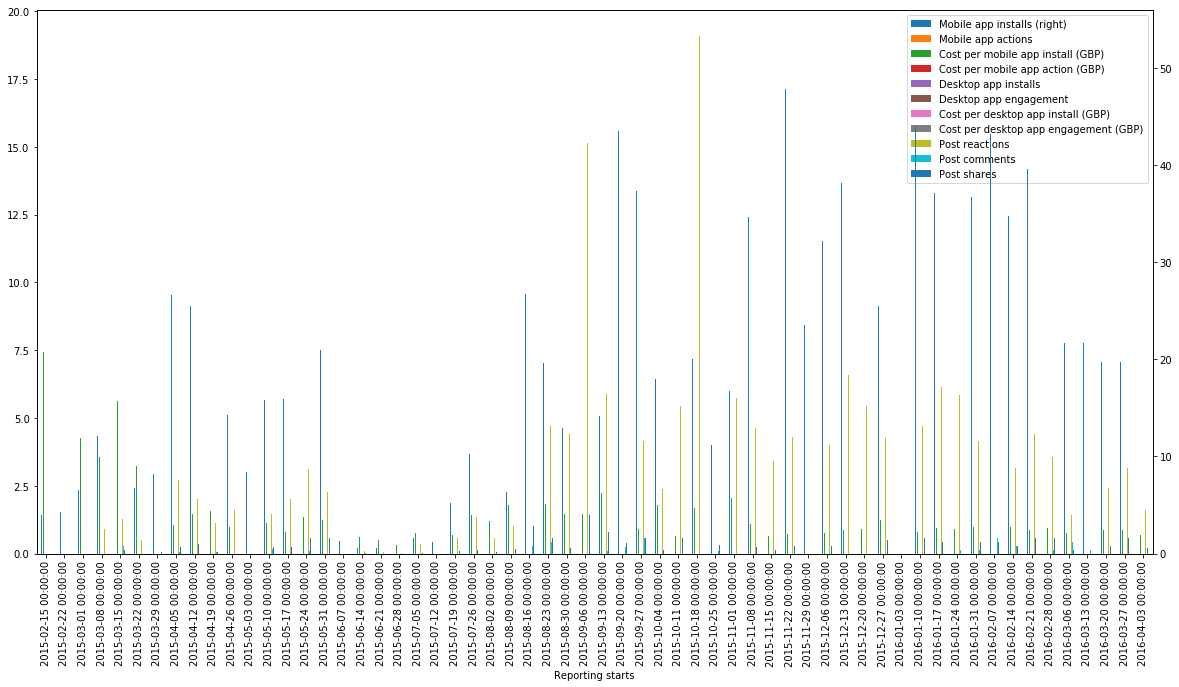

In [19]:
resampled.plot.bar(figsize=(20,10), secondary_y='Mobile app installs')